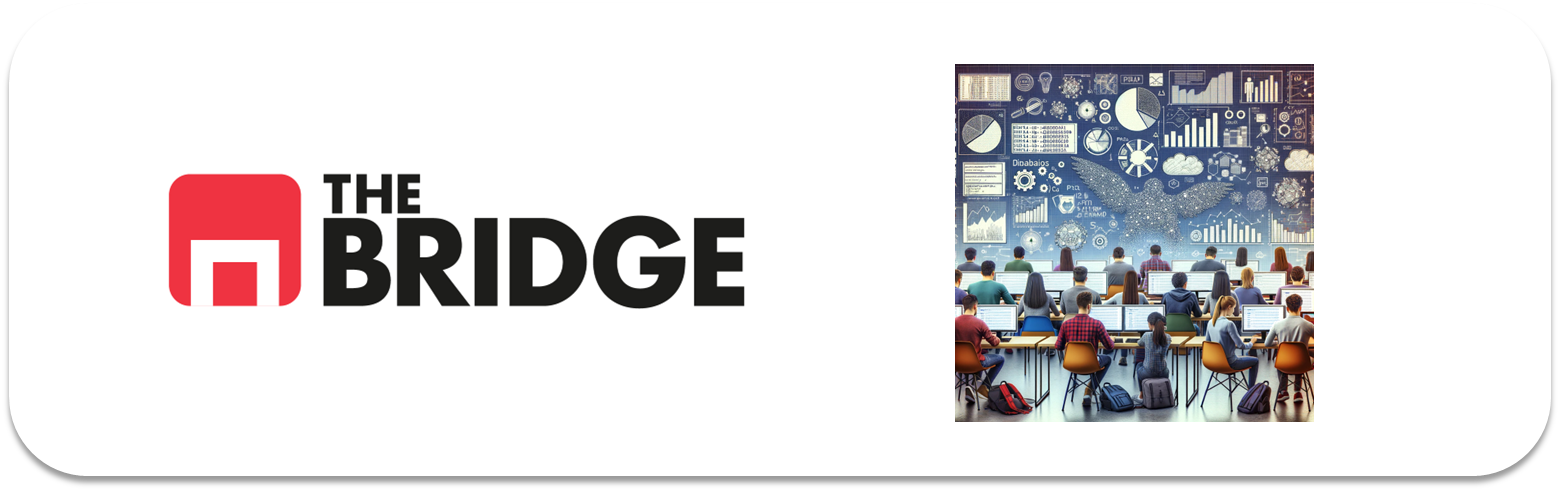

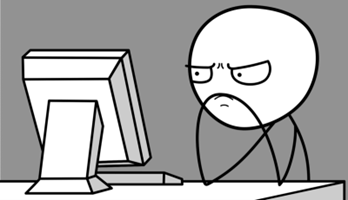

Para ejercitarte y afianzar lo aprendido sobre **Modelado RL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

El objetivo de los ejercicios es hacer un modelado de regresión lineal sobre el dataset de datos sobre diabetes de `sklearn`. Sigue las instrucciones cuando sea necesario para poder continuar

### Ejercicio 1: Cargar los datos

Primero, cargaremos el conjunto de datos de diabetes. Hazlo en la celda de abajo importando los conjuntos de datos y luego cargando el conjunto de datos en la variable `diabetes` usando la función `load_diabetes()` ([documentación](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)). Muestra los datos invocando la variable (ojo no es un `dataframe`) y luego muestra los valores de sus "claves".


In [2]:
from sklearn.datasets import load_diabetes 
diabetes = load_diabetes() # importar el dataset

In [3]:
diabetes.data.shape
diabetes["data"].shape  # variables tienen 442 filas y 10 columnas

(442, 10)

In [4]:
diabetes["target"].shape # target tiene 442 filas y 1 columna

(442,)

In [5]:
diabetes.feature_names  # nombres de las filas

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### Ejercicio 2: Entender los datos


Imprime la descripción en la celda de abajo usando el atributo `DESCR` de la variable `diabetes`. Lee la descripción de los datos cuidadosamente para entender completamente lo que representa cada columna.



In [6]:
print(diabetes.DESCR)  # da información sobre el dataset cargado en la variable diabetes

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Basándote en la descripción de los datos, responde a las siguientes preguntas:

1. ¿Cuántos atributos hay en los datos? ¿Qué significan?  
10 atributos, las diez primeras columnas.
    - age: edad en años
    - sex: sexo
    - bmi: índice de masa corporal
    - bp: TA media
    - s1: (tc) colesterol total
    - s2: (ldl) colesterol LDL
    - s3: (hdl) colesterol HDL
    - s4: (tch) colesterol total/HDL
    - s5: (ltg) TG
    - s6: (glu) glucemia

2. ¿Cuál es la relación entre `diabetes['data']` y `diabetes['target']`?  
Data son las features y target es la variable target (quantitative measure of disease progression one year after baseline)

3. ¿Cuántos registros hay en los datos?  
442


### Ejercicio 3: ETL basica

Crea una `dataframe` pandas que contenga todos los datos, llamalo `X`. Crea una variable `y` que contenga el target. Echa un vistazo y muestra la info general del mismo.

In [7]:
# Convert the dataset to a DataFrame
diabetes_df = pd.DataFrame(data= diabetes.data, columns=diabetes.feature_names)

# Add target variable to the DataFrame
diabetes_df["target"] = diabetes["target"]

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [9]:
# Creo una varialbe "X" que contiene las features
X = diabetes_df.iloc[:,:-1]

In [10]:
# Crear variable "y" que contiene el target
y = diabetes_df["target"]

### Ejercicio 4: Train y test

Crea los dataset de train y test, pero no uses el `train_test_split` de `sklearn`. Crea los siguientes datasets: `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test` y `diabetes_target_test`. Usa los últimos 20 registros para los datos de prueba y el resto para los datos de entrenamiento.


In [11]:
# División lineal no aleatoria como pide el ejemplo
diabetes_data_train = X[:-20]
diabetes_target_train = y.iloc[:-20]
diabetes_data_test = X.iloc[-20:]
diabetes_target_test = y.iloc[-20:]



In [12]:
print(diabetes_df.shape)
print(diabetes_data_train.shape)
print(diabetes_target_train.shape)
print(diabetes_data_test.shape)
print(diabetes_target_test.shape)

(442, 11)
(422, 10)
(422,)
(20, 10)
(20,)


In [13]:
# Como lo haría con sklearn

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# se hace así porque hemos separado X e y antes de hacer el split

### Ejercicio 5: MiniEDA

Como son todo variables numéricas muestra el coeficiente de correlación de todas las variables con el target. Independientemente del resultado quédate con todas las variables como features, crea una lista feature

In [14]:
lista_features = X.columns
lista_features

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [15]:
diabetes_df.corr(numeric_only= True)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


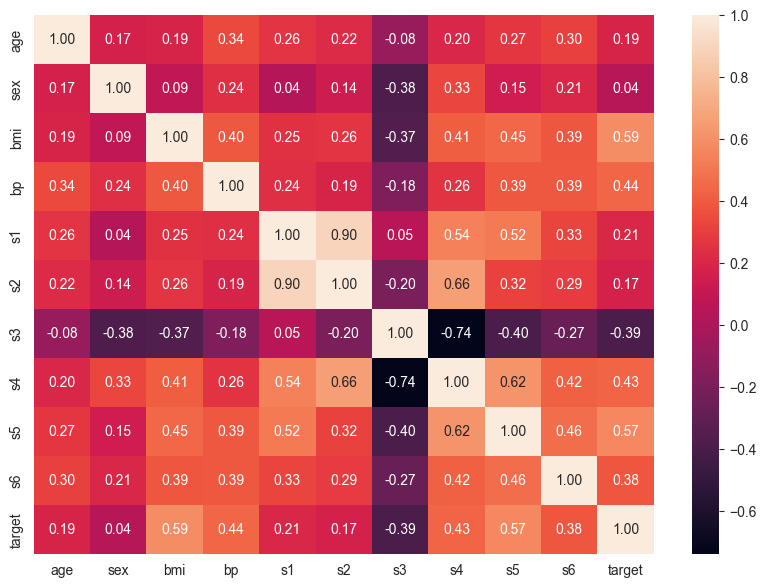

In [16]:
# we can go on and plot a correlation matrix to see the eventual correlations in the data

plt.figure(figsize=(10, 7))
sns.heatmap(diabetes_df.corr(numeric_only = True),annot=True, fmt='.2f');
plt.show();

In [17]:
# There does not seem to be a big correlation between the progression of diabetes (target) and the various features. 
# There is a moderate correlation with s5, or ‘lamotrigine’ with a 0.57 and with BMI, or ‘body mass’ index’, with a 0.59.

<Figure size 1000x700 with 0 Axes>

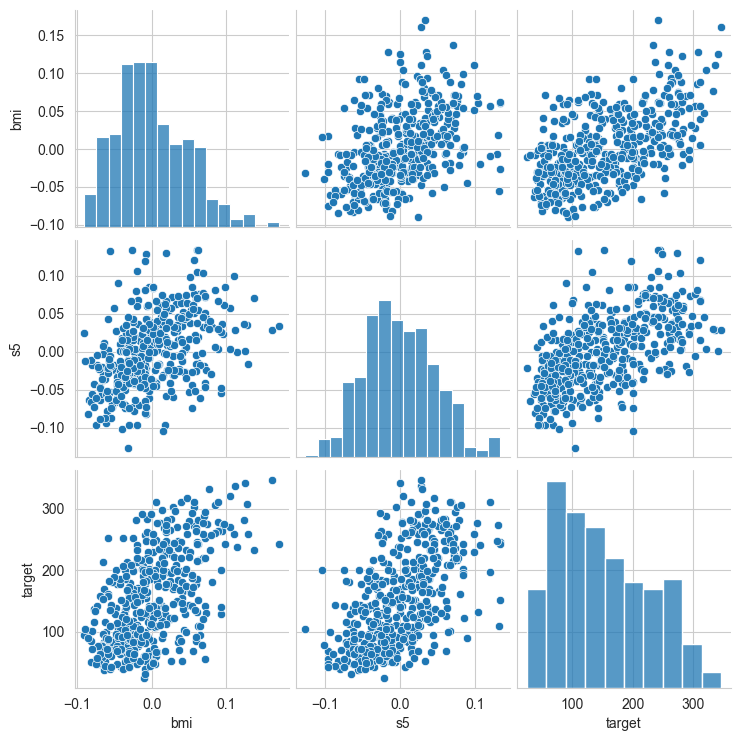

In [18]:
# So I want to see graphically if it is possible to identify some kind of 
# relationship between BMI and ltg with the progression of the disease:

#figure size
plt.figure(figsize=(10, 7))
#plotting graphs
sns.pairplot(diabetes_df[['bmi', 's5', 'target']])

In [19]:
# In the graphs above, we can see the relationship between ltg and progression and between BMI and progression. 
# There is a thickening of data, but it can also give the idea that the type of relationship is linear. 
# Let’s try a linear regression plot:

Text(0, 0.5, 'PROGRESSION')

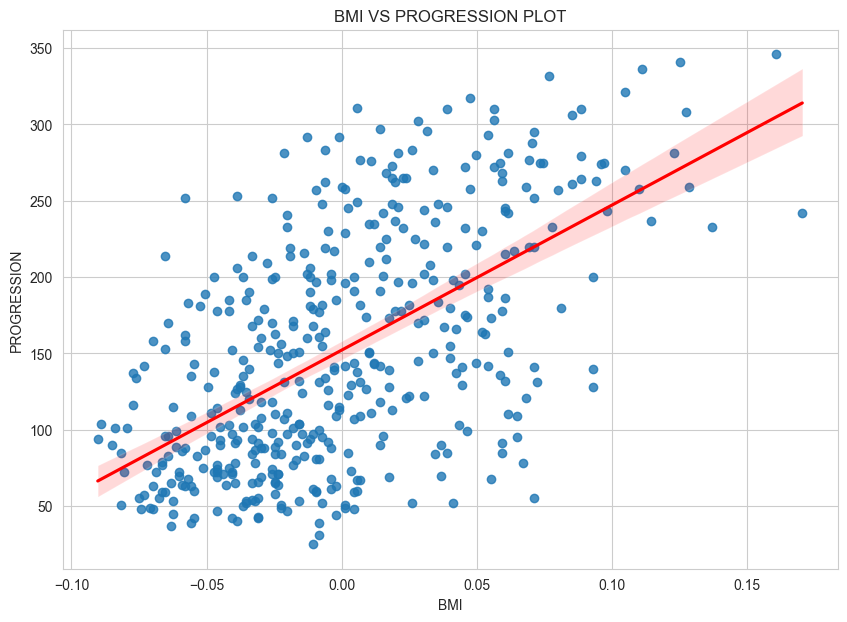

In [20]:
#figure size
plt.figure(figsize=(10, 7))
#regression between bmi and progression
sns.regplot(data=diabetes_df, x='bmi', y='target',line_kws={"color": "red"})
#labeling
plt.title('BMI VS PROGRESSION PLOT')
plt.xlabel('BMI')
plt.ylabel('PROGRESSION')

Text(0, 0.5, 'PROGRESSION')

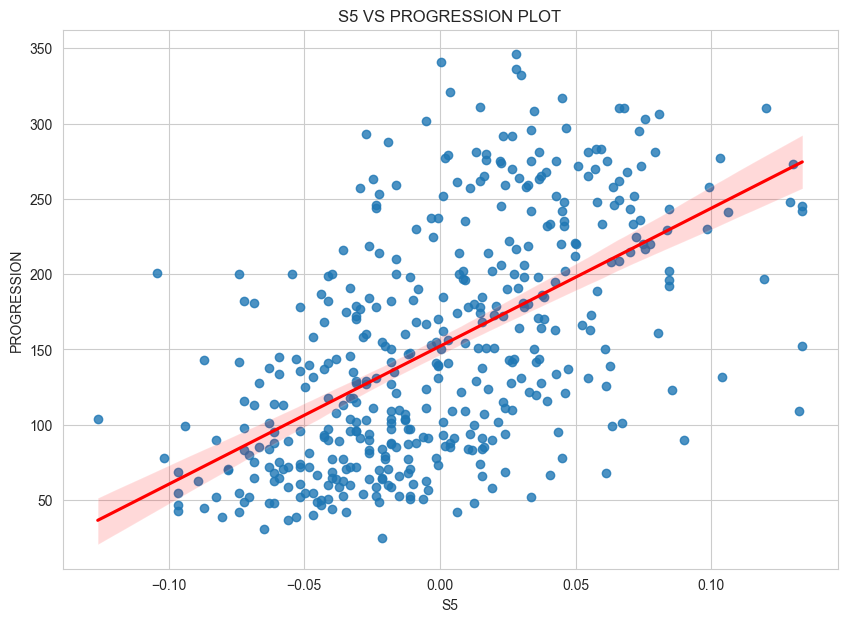

In [21]:
#figure size
plt.figure(figsize=(10, 7))
#regression between bmi and progression
sns.regplot(data=diabetes_df, x='s5', y='target',line_kws={"color": "red"})
#labeling
plt.title('S5 VS PROGRESSION PLOT')
plt.xlabel('S5')
plt.ylabel('PROGRESSION')

In [22]:
# In both cases, the dispersion of the data around the line is a bit too much, 
# ut on the other hand, it has already been seen that the correlation is moderate. 
# After the analysis seen above, I move on to choose the learning model, 
# considering as feature (X) all the columns of values and as label (y) the last column, 
# hich indicates the progression of the disease (progression). 
# This is a regression problem, as the values in y are continuous.

### Ejercicio 6: Escogemos e instanciamos modelos

En nuestro caso no vamos a crear una baseline ni a escoger otro modelo más que el regresor lineal. Importa e instancia un modelo de ese tipo de la librería `sklearn`

In [23]:
from sklearn.linear_model import LinearRegression

# Creamos un objeto  (CREAMOS EL MODELO, lo instanciamos)
lm = LinearRegression()

In [24]:
# Se puede hacer todo del tirón con: 
#fitting the model
# reg = LinearRegression().fit(X_train, y_train)

### Ejercicio 7: Selección con cross-validation o entrenamiento

Cómo solo tenemos un modelo no hace falta emplear la cross-validation para comprobar sus prestaciones con otro (esta situación no será la normal en el futuro, pero ahora nos vale), así que pasamos directamente al entrenamiento. Entrena tu modelo:



In [25]:
# Entrenamos con los datos de train
lm.fit(diabetes_data_train, diabetes_target_train)

# hacemos "fit" de los datos de entrada (data, features) a un target

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Antes de seguir, ¿por qué no hemos escalado o tratado las features numéricas antes de hacer el entrenamiento?

### Ejercicio 8: Visualizando los parámetros


Imprime los coeficientes y el intercepto del modelo. Muéstralos luego como un dataframe.

In [26]:
# Coeficientes (slope)
print(f'the slope is:{lm.coef_}')

the slope is:[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


In [27]:
# vistos como un dataframe para interpretarlos mejor
coef_df = pd.DataFrame(lm.coef_, X.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
age,0.306094
sex,-237.635570
bmi,510.538048
bp,327.729878
s1,-814.111926
s2,492.799595
s3,102.841240
s4,184.603496
s5,743.509388
s6,76.096646


In [28]:
# Intercept
print(f'the intercept is:{lm.intercept_: .2f}')

the intercept is: 152.76


### Ejercicio 9: Visualizando la regresión

Escribe la función de regresión, que constituye el corazón del modelo, (aproxima los coeficientes si lo crees conveniente):

$y = w_0 + w_1x_1 + w_2x_2 + ...$


### Ejercicio 10: Evaluación (I)

Muestra las predicciones para el dataset de test y muestra la diferencia con los valores reales:

In [29]:
#predictions
y_test_pred = lm.predict(diabetes_data_test)
y_train_pred = lm.predict(diabetes_data_train)

### Ejercicio 11

Importa las métricas de sklearn que necesites y, apoyandote en el método `score` del modelo, muestra el MAE, MSE, RMSE, MAPE y coeficiente de determinación $R^2$) para el modelo y el caso del test

In [36]:
from sklearn import metrics

In [37]:
# TRAIN Error

pred_train = lm.predict(diabetes_data_train)

print('MAE train', metrics.mean_absolute_error(diabetes_target_train, pred_train))
print('MSE train', metrics.mean_squared_error(diabetes_target_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(diabetes_target_train, pred_train)))
print('R2 train', lm.score(diabetes_data_train,diabetes_target_train))

MAE train 43.61874785130126
MSE train 2901.5661704028876
RMSE train 53.86618763568559
R2 train 0.5122247821066495


In [35]:
# TEST Error

pred_test = lm.predict(diabetes_data_test)

print('MAE train', metrics.mean_absolute_error(diabetes_target_test, pred_test))
print('MSE train', metrics.mean_squared_error(diabetes_target_test, pred_test))
print('RMSE train', np.sqrt(metrics.mean_squared_error(diabetes_target_test, pred_test)))
print('R2 train', lm.score(diabetes_data_test,diabetes_target_test))

MAE train 36.60961865545879
MSE train 2004.5186863342096
RMSE train 44.77185149549
R2 train 0.585085427447195


In [ ]:
'''
Coeff. of determination on train set: 0.53
Coeff. of determination on test set: 0.45
R², or the coefficient of determination, tells us the link between the variability of the data and the correctness of the model; 
the closer R² to 1 the better, because it means the model is accurate. 
The results obtained are not satisfactory, being R² close to 0.5, 
even if it is good that the values are similar between the test and the train set. 
This is telling us that this type of model is not suitable for this type of problem. 


The mean absolute error is: 42.79
The root mean squared error is: 53.85
These are high values (MAE should be "as near as possible" to 0), which continue to make me feel discouraged about the use of this model … but I want to make a couple of visualizations.
'''

### EXTRA:

1. Pinta la comparación entre predicciones (eje x) y valores reales (eje y) y añade la diagonal y=x sobre la que deberían caer todos los puntos en un predictor perfecto.

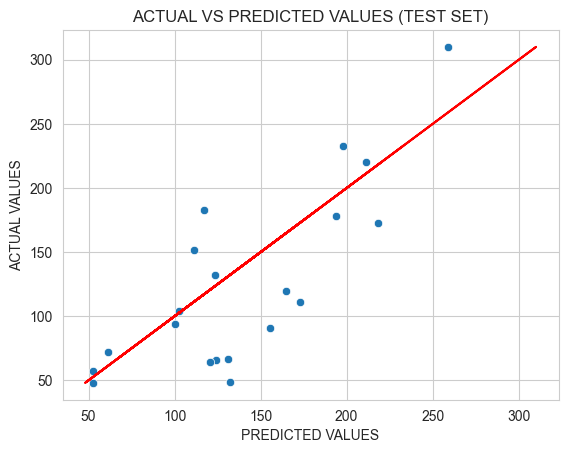

In [43]:
# Segun workout
'''
predictions = lm.predict(X_test)

sns.scatterplot(x=predictions,y=y_test);
plt.plot([0,2.5e6],[0,2.5e6],'red')
plt.show()
'''

sns.scatterplot(x=y_test_pred,y=diabetes_target_test)
plt.plot(diabetes_target_test, diabetes_target_test, color='r')

plt.title('ACTUAL VS PREDICTED VALUES (TEST SET)')
plt.xlabel('PREDICTED VALUES')
plt.ylabel('ACTUAL VALUES')

plt.show()

In [ ]:
# As can be seen from the graph above, there is no clear tendency for the spots 
# to be distributed around a line, 
# confirming the fact that linear regression is not a good model.

2. Muestra la importancia de cada coeficiente de forma gráfica utilizando diagramas de barras horizontales (barh, en pyplot)

In [ ]:
coef_df.sort_values('Coefficient', ascending=False)
# Recuerda, este no es su orden de importancia real. 
# Para saber su importancia debemos escalar (ponerlas en unidades equivalentes)

,Coefficient
s5,743.509388
bmi,510.538048
s2,492.799595
bp,327.729878
s4,184.603496
s3,102.841240
s6,76.096646
age,0.306094
sex,-237.635570
s1,-814.111926


In [47]:
# Para conocer la importancia de variables tenemos que **estandarizar** los datos antes de entrenar el modelo
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(diabetes_data_train)

X_train_scaled = scaler.transform(diabetes_data_train)

In [48]:
lm_scaled = LinearRegression()
lm_scaled.fit(X_train_scaled, diabetes_target_train) # creamos un modelo de regresión lineal, donde entrenamos contra lo que está escalado.

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
feat_coef = pd.DataFrame(lm_scaled.coef_,
                        diabetes_data_train.columns, 
                        columns=['importance_standarized']).sort_values('importance_standarized',
                                                                       ascending=False)
feat_coef

# Ahora sí podemos decir que el más importante es s5

,importance_standarized
s5,35.644497
bmi,24.295677
s2,23.384473
bp,15.598870
s4,8.799364
s3,4.817996
s6,3.606619
age,0.014631
sex,-11.300962
s1,-38.634072


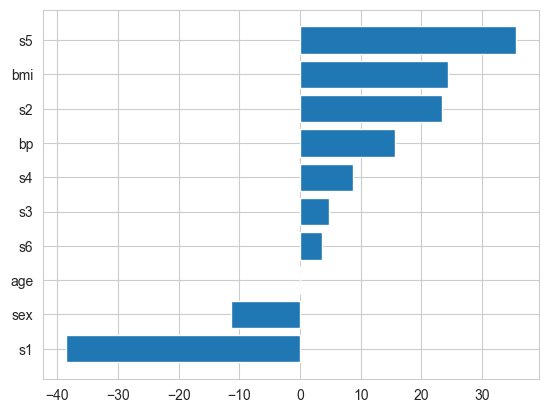

In [50]:
features = feat_coef.sort_values('importance_standarized')
plt.barh(features.index,features.importance_standarized)
plt.show()

In [ ]:
# Podríamos planteranos quitar s3 y s6
# DUDA: qué hacemos con las negativas??